In [1]:
import pandas as pd
from utils import make_plot, rmse  

In [2]:
# log_file_path = 'optim_wardi_test.log'
# log_file_path = 'regular_wardi_test.log'
log_file_path = 'loggg.log'

# Reading the .log file into a pandas DataFrame
df_log = pd.read_csv(log_file_path, header=0, dtype={'metadata': str})

# Display the first few rows to confirm successful import
df_log.head()

,time,x,y,z,yaw,throttle,roll_rate,pitch_rate,yaw_rate,x_ref,y_ref,z_ref,yaw_ref,pred_time,nr_time,ctrl_callback_time,metadata
0,7.152557e-07,-0.020292,0.014580,0.275920,-0.001793,0.738745,0.8,-0.291350,-2.868443e-11,0.0,0.8,-0.8,-0.001793,0.189991,0.189991,0.259527,Sim
1,2.598403e-01,-0.020292,0.014580,0.275920,-0.001793,0.769888,0.8,-0.203865,-2.868443e-11,0.0,0.8,-0.8,-0.001793,0.000722,0.000722,0.003812,flat wardi with jax
2,2.701974e-01,-0.022356,0.012160,0.286376,-0.001718,0.791843,0.8,-0.158810,1.619787e-11,0.0,0.8,-0.8,-0.001718,0.000306,0.000306,0.004453,1x Speed
3,2.798142e-01,-0.022550,0.012153,0.287044,-0.001697,0.807062,0.8,-0.123223,1.247266e-11,0.0,0.8,-0.8,-0.001697,0.000212,0.000212,0.003690,QuatYawError
4,2.897422e-01,-0.022751,0.012149,0.287733,-0.001685,0.817655,0.8,-0.098474,1.025514e-11,0.0,0.8,-0.8,-0.001685,0.000203,0.000203,0.003232,0


In [3]:
print(f"This data comes from: {df_log['metadata'][0]}")
print(f"Predictor was: {df_log['metadata'][1]}")
print(f"Speed: {df_log['metadata'][2]}")
print(f"(Valid for Nonlin & Jax predictor only) Predictor was: {df_log['metadata'][3]}")
print(f"For yaw error we used: {df_log['metadata'][4]}")
print(f"{df_log['metadata'][5]}")
print(f"Mean NR computation time: {df_log['nr_time'].mean()}")
print(f"Mean NR computation freq: {1/df_log['nr_time'].mean()}")
print(f"Mean callback time: {df_log['ctrl_callback_time'].mean()}")
print(f"RMSE: {rmse(df_log)}")


This data comes from: Sim
Predictor was: flat wardi with jax
Speed: 1x Speed
(Valid for Nonlin & Jax predictor only) Predictor was: QuatYawError
For yaw error we used: 0
0
Mean NR computation time: 0.0003069850484644146
Mean NR computation freq: 3257.487636619928
Mean callback time: 0.003747639034254703
RMSE: 0.43618322753127126


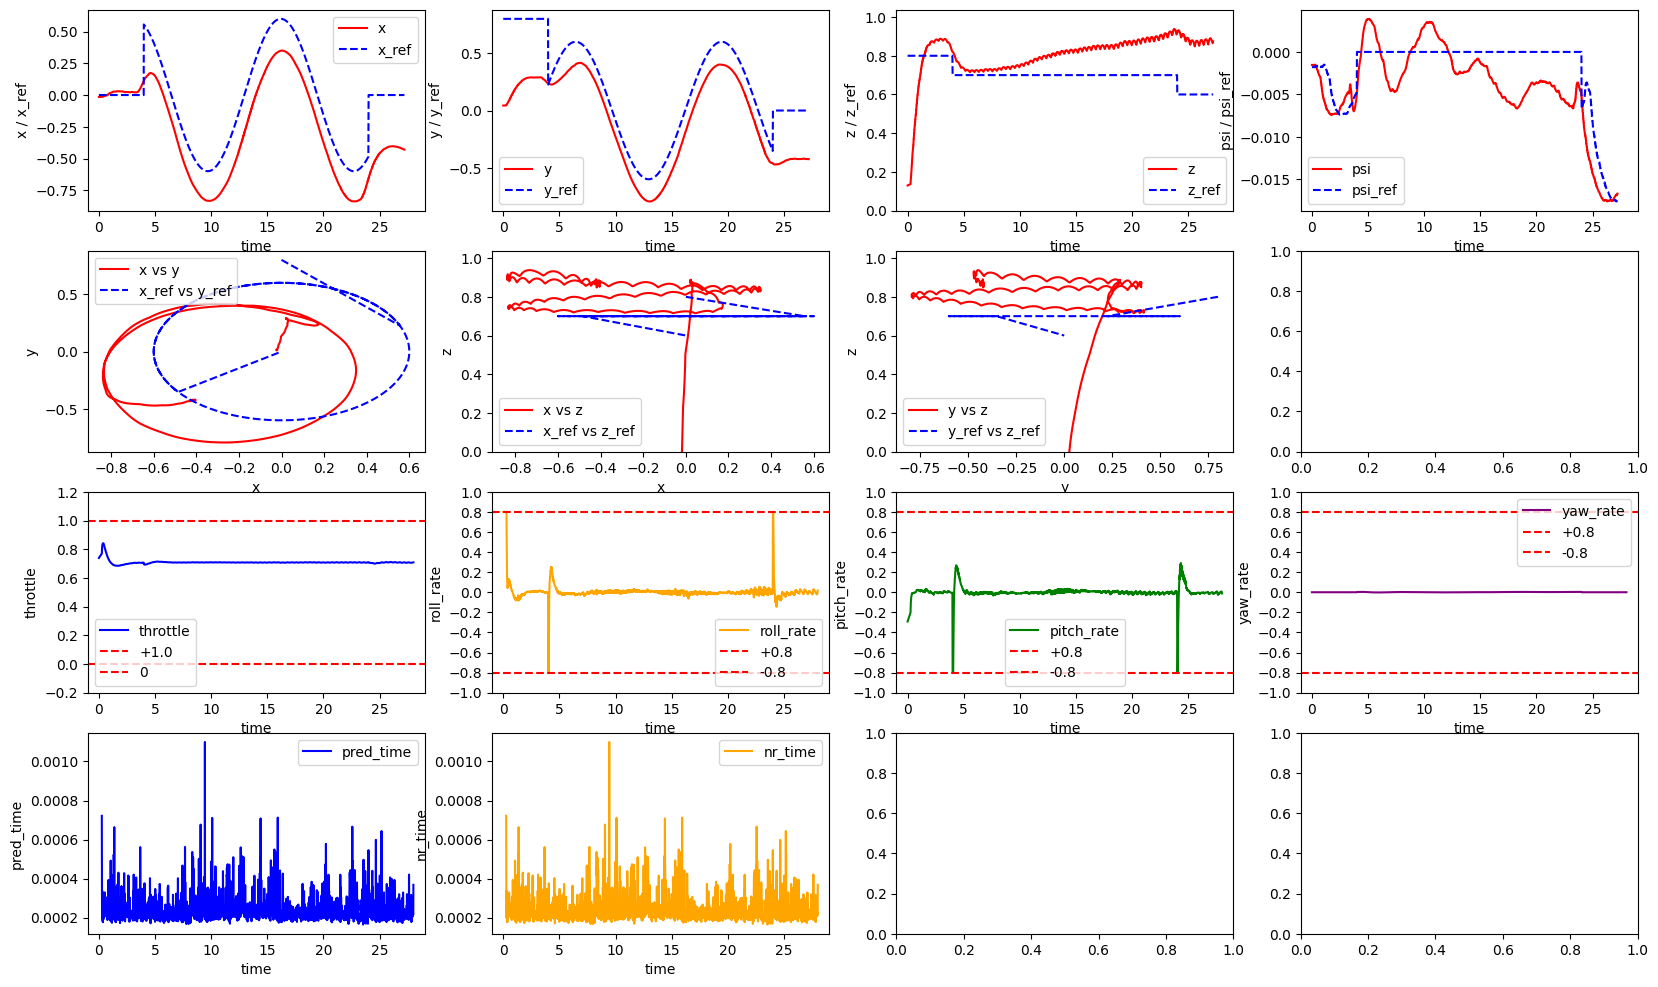

In [4]:
# Reuse the plotting function defined earlier for the uploaded .log data
make_plot(df_log)

In [27]:
def circle_horz_ref_func(): #Returns Circle Reference Trajectory in Horizontal Plane ([x,y,z,yaw])
    """ Returns circle reference trajectory in horizontal plane. """
    print("circle_horz_ref_func")

    return [1,1,1,1]

def circle_vert_ref_func(): #Returns Circle Reference Trajectory in Horizontal Plane ([x,y,z,yaw])
    """ Returns circle reference trajectory in horizontal plane. """
    print("circle_horz_ref_func")

    t_traj = self.time_from_start - self.cushion_time
    t = t_traj + self.T_LOOKAHEAD
    
    PERIOD = 13 # used to have w=.5 which is rougly PERIOD = 4*pi ~= 12.56637

    if self.double_speed:
        PERIOD /= 2.0

    w = 2*m.pi / PERIOD
    r = np.array([[.6*m.cos(w*t), .6*m.sin(w*t), -0.7, 0.0]]).T

    return r

In [28]:
# Set main trajectory function
main_traj = circle_horz_ref_func  # Choose the function reference

# Use a dictionary for lookup
trajectory_dictionary = {
    "circle_horz": circle_horz_ref_func,
    "circle_vert": circle_vert_ref_func
}

# Get function name from dictionary
selected_traj = trajectory_dictionary["circle_horz"]
print(selected_traj())  # Calling the selected trajectory function

circle_horz_ref_func
[1, 1, 1, 1]


In [22]:
trajectory_dictionary = {main_traj.__name__: 'circle_horz_ref_func'}

In [23]:
trajectory_dictionary[main_traj]

KeyError: <function circle_horz_ref_func at 0x7f3cd888b280>

In [29]:
import numpy as np
import math as m

class TrajectoryGenerator:
    def __init__(self):
        self.time_from_start = 0
        self.cushion_time = 0
        self.T_LOOKAHEAD = 0
        self.double_speed = False

    def circle_horz_ref_func(self): 
        """Returns a circular reference trajectory in the horizontal plane ([x, y, z, yaw])."""
        print("circle_horz_ref_func called")

        t_traj = self.time_from_start - self.cushion_time
        t = t_traj + self.T_LOOKAHEAD

        PERIOD = 13 

        if self.double_speed:
            PERIOD /= 2.0

        w = 2 * m.pi / PERIOD
        r = np.array([[0.6 * m.cos(w * t), 0.6 * m.sin(w * t), -0.7, 0.0]]).T  # Circle in XY

        return r

    def circle_vert_ref_func(self):  
        """Returns a circular reference trajectory in the vertical plane ([x, y, z, yaw])."""
        print("circle_vert_ref_func called")

        t_traj = self.time_from_start - self.cushion_time
        t = t_traj + self.T_LOOKAHEAD

        PERIOD = 13  

        if self.double_speed:
            PERIOD /= 2.0

        w = 2 * m.pi / PERIOD
        r = np.array([[0.0, 0.6 * m.cos(w * t), 0.6 * m.sin(w * t) - 0.7, 0.0]]).T  # Circle in YZ

        return r

# Create an instance
traj_gen = TrajectoryGenerator()

# Choose which trajectory function to use
main_traj = traj_gen.circle_horz_ref_func  # Can be set to circle_vert_ref_func instead

# Reverse lookup dictionary (function reference → name string)
trajectory_dictionary = {
    traj_gen.circle_horz_ref_func: "circle_horz_ref_func",
    traj_gen.circle_vert_ref_func: "circle_vert_ref_func"
}

# Lookup the function name based on the function reference
main_traj_name = trajectory_dictionary[main_traj]
print(f"Selected trajectory: {main_traj_name}")  # Should print: "Selected trajectory: circle_horz_ref_func"


Selected trajectory: circle_horz_ref_func
